In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/credit-card-defaults.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


In [14]:
def lasso_ridge_compare(alpha_min, alpha_max, alpha_step):
    
    lambd = []
    ridge_score = []
    lasso_score = []
    
    for alph in np.arange(alpha_min, alpha_max, alpha_step):
        
        lambd.append([alph])
        
        ridge = linear_model.Ridge(alpha = alph)
        ridge_fit = ridge.fit(X_train2, Y_train)
        ridge_score.append(ridge.score(X_train2, Y_train))
        
        lasso = linear_model.Lasso(alpha = alph)
        lasso_fit = lasso.fit(X_train2, Y_train)
        lasso_score.append(lasso.score(X_train2, Y_train))
        
    print(lambd)
    print(ridge_score)
    print(lasso_score)
    plt.plot(lambd, ridge_score)
    plt.plot(lambd, lasso_score)
    plt.xlabel('Lambda')
    plt.ylabel('R-squared')
    plt.legend(['ridge', 'lasso'])
    plt.show()

[[1], [11], [21], [31], [41], [51], [61], [71], [81], [91]]
[0.5739722903477162, 0.5739692445664578, 0.5739611761361118, 0.5739481571526951, 0.5739302582353818, 0.5739075485961491, 0.5738800961157913, 0.5738479674111194, 0.5738112278945229, 0.5737699418270331]
[0.026834134351719777, 0.026834001912294684, 0.02683364874049488, 0.026833074836319915, 0.026832280199770242, 0.026831264830845636, 0.02683002872954598, 0.026828571895871508, 0.026826894329822108, 0.026824996031397874]


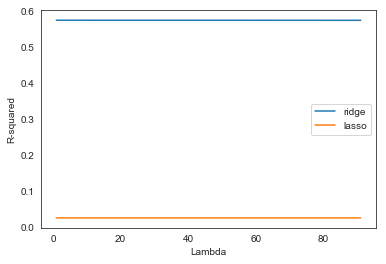

In [15]:
lasso_ridge_compare(1, 100, 10)

[[0.01], [0.11], [0.21000000000000002], [0.31000000000000005], [0.41000000000000003], [0.51], [0.6100000000000001], [0.7100000000000001], [0.81], [0.91]]
[0.5739723179972083, 0.5739723157206424, 0.573972314810177, 0.5739723134501231, 0.5739723115961979, 0.573972309238908, 0.5739723063750333, 0.57397230300321, 0.5739722991227849, 0.5739722947334246]
[0.5737681044618193, 0.5608597084819029, 0.526881801581696, 0.471667431040121, 0.39521398539042163, 0.29752505054909395, 0.1785985512642465, 0.03843592905506055, 0.02683413473126894, 0.026834134541439014]


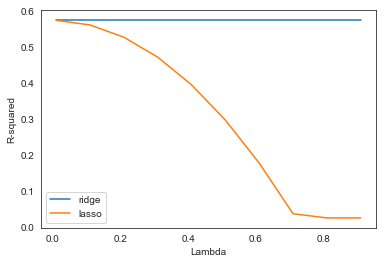

In [16]:
lasso_ridge_compare(0.01, 1, 0.1)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[[0.001], [0.011], [0.020999999999999998], [0.030999999999999996], [0.040999999999999995], [0.05099999999999999], [0.06099999999999999], [0.071], [0.08099999999999999], [0.09099999999999998]]
[0.5739723371944385, 0.5739723177998999, 0.573972316853919, 0.5739723165075573, 0.5739723163185114, 0.5739723161912713, 0.5739723160929395, 0.5739723160091487, 0.5739723159326243, 0.5739723158592897]
[0.573936967457606, 0.5737405106297058, 0.5733200368054099, 0.5726870842059028, 0.5719227389382102, 0.5709457102820416, 0.5697565118107231, 0.5683549487029909, 0.5667410209588452, 0.5649147285782856]


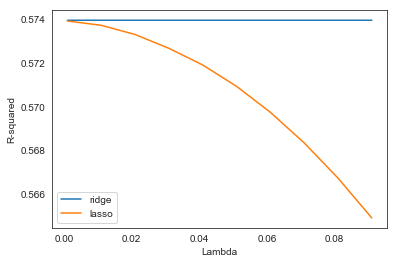

In [17]:
lasso_ridge_compare(0.001, 0.1, 0.01)